In [15]:
import pandas as pd
import numpy as np
#import os

# Grabbing directory as found in File Explorer


In [16]:
cd C:\Users\18642\OneDrive - Clemson University\CI Work

C:\Users\18642\OneDrive - Clemson University\CI Work


In [17]:
#making function to check against proper filepath and then the empty cell
#defining function
read_in= False
def compat_ver(csv_file):
    global read_in
    try:
        main= pd.read_csv(csv_file)
        read_in= True
    except FileNotFoundError:
        print("Error. Please make sure you are looking in the right directory using cd [filepath]. Please check directory and then try again.")
    if read_in==True: 
        if str(main.iloc[1][3])== "nan":
            print("Error. Please use and implement a combination of point AND \nstate events within BORIS to create a compatible .csv file.")
        else:
            print("File compatible. Data saved to variable %w") #same consequence as previous ELIF condition, but may help with troubleshooting,
            #may want to implement a counter


In [18]:
#Dataframe Original (note: user_def is user-defined variable here)
user_def= pd.read_csv("Sample_6.csv")
user_def_clean= user_def.iloc[:, 6:]
user_def_clean = user_def_clean.fillna(0)
user_def_clean

,Subject,Behavior,Behavioral category,Modifiers,Behavior type,Start (s),Stop (s),Duration (s),Comment start,Comment stop
0,Whale 1,dive,under water,0.0,STATE,6.618,9.685,3.067,0.0,0.0
1,Whale 1,swim,under water,0.0,STATE,11.232,35.251,24.019,0.0,0.0
2,Whale 1,sneeze,under water,0.0,POINT,18.134,18.134,0.000,0.0,0.0
3,Whale 1,cry,under water,0.0,POINT,19.668,19.668,0.000,0.0,0.0
4,Whale 1,rise,above water,0.0,STATE,26.568,30.401,3.833,0.0,0.0
5,Whale 1,dive,under water,0.0,STATE,31.401,33.717,2.316,0.0,0.0
6,Whale 1,net,under water,0.0,STATE,39.068,42.901,3.833,0.0,0.0
7,Whale 1,swim,under water,0.0,STATE,44.192,49.801,5.609,0.0,0.0
8,Whale 1,cry,under water,0.0,POINT,46.485,46.485,0.000,0.0,0.0


In [19]:
#Cell above uses 0 instead of nan values

In [20]:
compat_ver("Sample_6.csv")

File compatible. Data saved to variable %w


In [21]:
##State Event Graphing
#Grabbing values to establish ONLY state events
user_state_only= user_def_clean[user_def_clean['Behavior type']=="STATE"]
#Grabbing unique behaviors using same function as before
a_state= np.unique(user_state_only.iloc[:, 1], return_counts=True)
#Creating a dictionary to obtain duration in duration format {"cry": ____}
a_state_ind= {}
for x in a_state[0]:
    a_state_ind[x]=[]
#Looking at keys and trying to iterate through the list of keys in dictionary
for x in a_state_ind.keys():
    print(user_state_only[user_state_only["Behavior"]==x]["Duration (s)"])

0    3.067
5    2.316
Name: Duration (s), dtype: float64
6    3.833
Name: Duration (s), dtype: float64
4    3.833
Name: Duration (s), dtype: float64
1    24.019
7     5.609
Name: Duration (s), dtype: float64


In [22]:
#Creating random dictionary and playing around with values
b= {"dog": "", "cat": ""}
len(b["dog"])
#Creating list to append things to within the dictionary
b_list= [4,5,6,7,8]
b["dog"]= b_list
b_list.append(9)
b_list

[4, 5, 6, 7, 8, 9]

In [23]:
#Implementing the dynamic lists into the dictionaries now
for x in a_state_ind.keys():
    a_state_ind[x].append(user_state_only[user_state_only["Behavior"]==x]["Duration (s)"])
a_state_ind

{'dive': [0    3.067
  5    2.316
  Name: Duration (s), dtype: float64],
 'net': [6    3.833
  Name: Duration (s), dtype: float64],
 'rise': [4    3.833
  Name: Duration (s), dtype: float64],
 'swim': [1    24.019
  7     5.609
  Name: Duration (s), dtype: float64]}

In [24]:
#HOW TO INDEX THE VALUES??
a_state_ind["swim"][0][1]   #note: have to use 0 to get key, then 1 to get the element in the list itself

24.019

In [25]:
#Setting up new dictionary for totals
a_state_total= {}
for x in a_state_ind.keys():
    a_state_total[x]= sum(a_state_ind[x][0][:])
    
#Putting a_state_total into its own dataframe for sorting purposes
state_frame= pd.DataFrame.from_dict(a_state_total, orient= "Index", columns= ["Duration"])
state_frame_sorted= state_frame.sort_values("Duration", ascending= True)
state_frame_sorted

,Duration
net,3.833
rise,3.833
dive,5.383
swim,29.628


In [26]:
a_state_total

{'dive': 5.383, 'net': 3.833, 'rise': 3.833, 'swim': 29.628}

In [27]:
state_frame_sorted.index

Index(['net', 'rise', 'dive', 'swim'], dtype='object')

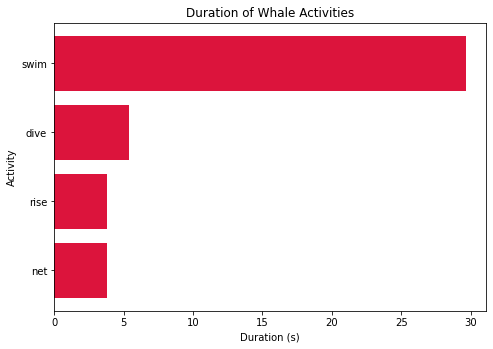

In [28]:
import matplotlib.pyplot as plt
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
plt.barh(state_frame_sorted.index, state_frame_sorted['Duration'], color="crimson")
plt.title("Duration of Whale Activities")
plt.xlabel("Duration (s)")
plt.ylabel("Activity")

plt.show()